In [2]:
import numpy as np
import matplotlib.pyplot as plt
from mpmath import linspace


### Задание 1
На вход передатчика подается некоторый сигнал во времени. В качестве сигнала возможно рассмотреть сигнал прямоугольных периодических импульсов.

Реализовать свертку сигнала с некоторым ядром во временной области.
В качестве ядра свертки использовать (а) y=A•exp(-x^2), (б) любую линейную функцию.

Замечание: Для реализации свертки можно использовать готовую встроенную функцию numpy: convolve(signal,kernel)

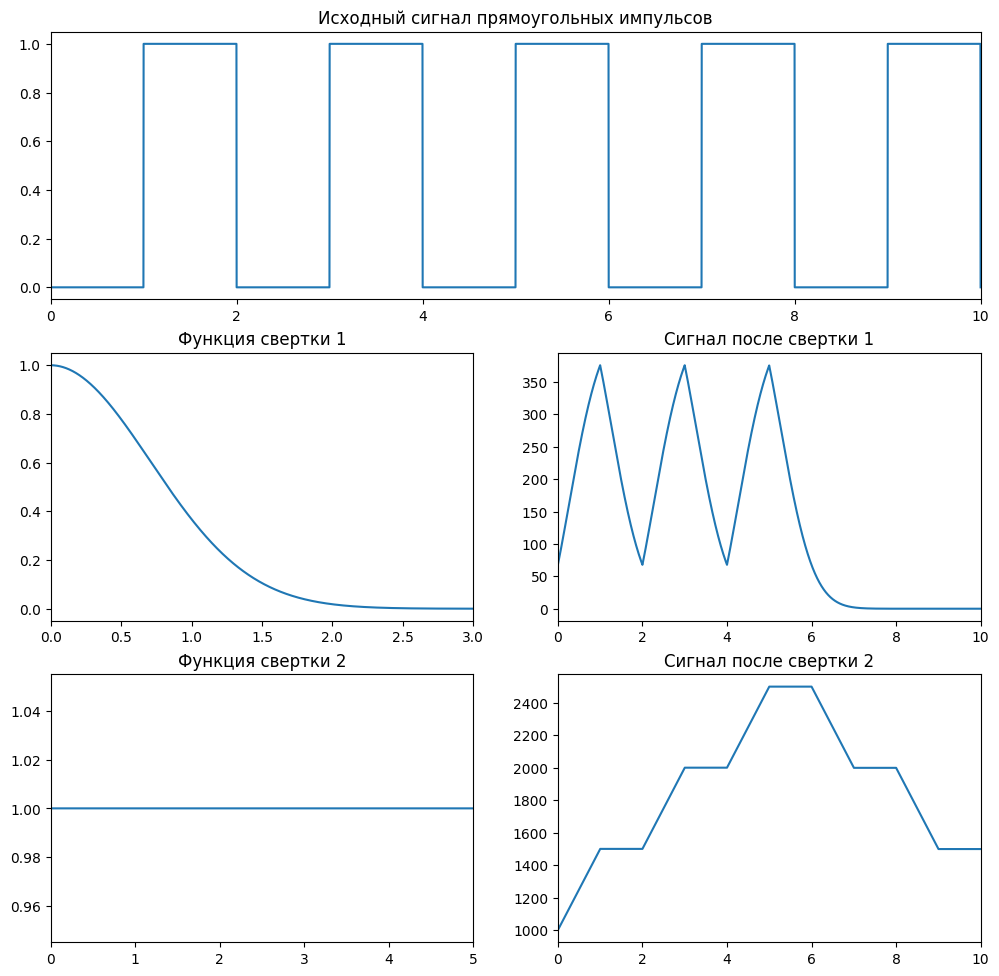

In [163]:
def rectangular_signal(x, period, amplitude):
    if x % period < period / 2:
        return 0
    else:
        return amplitude
        
    
def kernel_exp(x, amplitude):
    return amplitude * np.exp(-(x**2))
    

def kernel_lin(x, amplitude):
    return amplitude * np.ones_like(x)


period = 2
amplitude = 1
sampling_rate = 5000

x = np.linspace(0, 10, sampling_rate)
y = np.array([rectangular_signal(t, period, amplitude) for t in x])

kernel_1 = kernel_exp(x, amplitude)
y_conv_1 = np.convolve(y, kernel_1, mode='same')

kernel_2 = kernel_lin(x, amplitude)
y_conv_2 = np.convolve(y, kernel_2, mode='same')

plt.figure(figsize=(12, 16))

plt.subplot(4, 1, 1)
plt.plot(x, y)
plt.xlim(0, 10)
plt.title("Исходный сигнал прямоугольных импульсов")

plt.subplot(4, 2, 3)
plt.plot(x, kernel_1)
plt.xlim(0, 3)
plt.title("Функция свертки 1")

plt.subplot(4, 2, 4)
plt.plot(x, y_conv_1)
plt.xlim(0, 10)
plt.title("Сигнал после свертки 1")

plt.subplot(4, 2, 5)
plt.plot(x, kernel_2)
plt.xlim(0, 5)
plt.title("Функция свертки 2")

plt.subplot(4, 2, 6)
plt.plot(x, y_conv_2)
plt.xlim(0, 10)
plt.title("Сигнал после свертки 2")

plt.show()

### Задание 2
Чтобы разобраться в алгоритме свертки двух сигналов – реализуйте свой алгоритм, осуществляющий свертку сигнала с произвольным ядром.

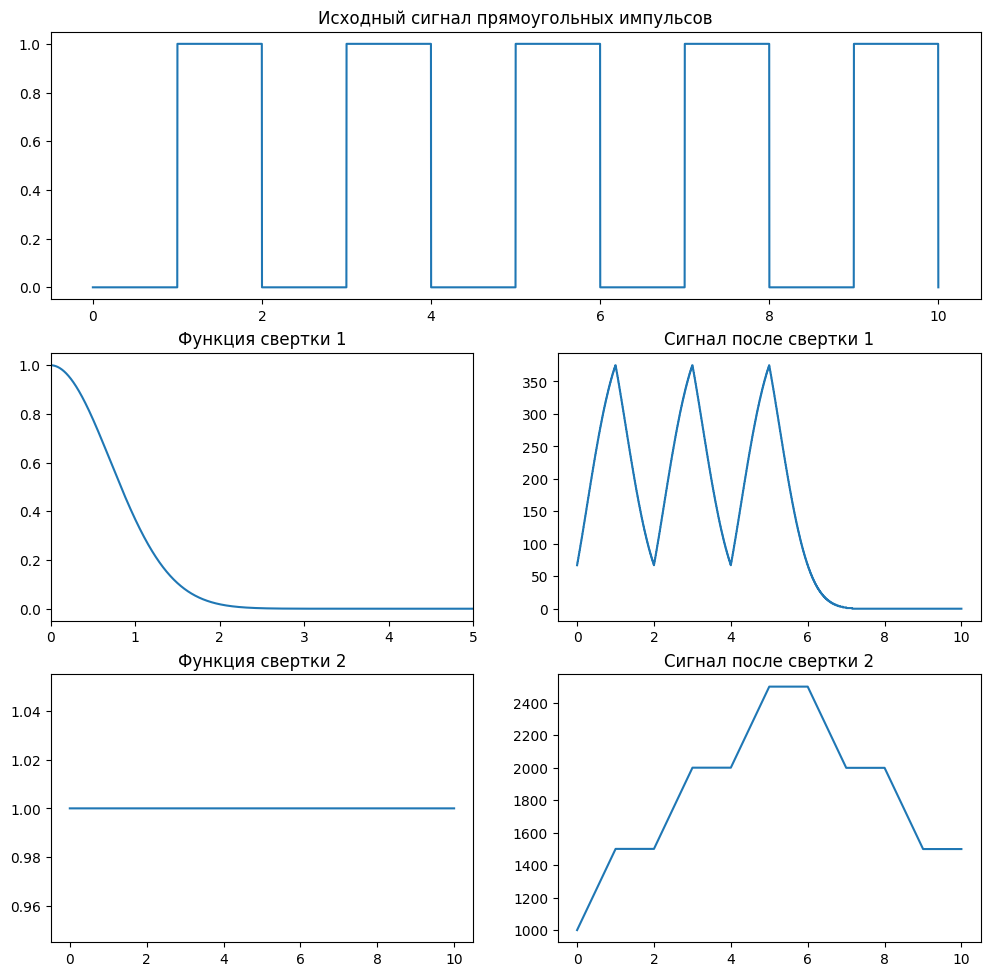

In [38]:
def signal_convolve(signal, kernel):
    new_signal = np.zeros(2 * signal.shape[0])

    for i in range(signal.shape[0]):
        new_signal[i + signal.shape[0] // 2] = signal[i]

    res = np.zeros_like(signal)

    for i in range(signal.shape[0]):
        res[i] = np.sum(new_signal[i : i + kernel.shape[0]] * kernel[::-1])

    return res


y_conv_1 = signal_convolve(y, kernel_1)
y_conv_2 = signal_convolve(y, kernel_2)

plt.figure(figsize=(12, 16))

plt.subplot(4, 1, 1)
plt.plot(x, y)
plt.title("Исходный сигнал прямоугольных импульсов")

plt.subplot(4, 2, 3)
plt.plot(x, kernel_1)
plt.xlim(0, 5)
plt.title("Функция свертки 1")

plt.subplot(4, 2, 4)
plt.plot(x, y_conv_1)
plt.title("Сигнал после свертки 1")

plt.subplot(4, 2, 5)
plt.plot(x, kernel_2)
plt.title("Функция свертки 2")

plt.subplot(4, 2, 6)
plt.plot(x, y_conv_2)
plt.title("Сигнал после свертки 2")

plt.show()

### Задание 3
Для любого выбранного Вами ядра свертки убедиться, что свертка во временной области эквивалентна умножению в частотной области (теорема о свертке).

![Теорема о свертке:](pics/theorem.png)

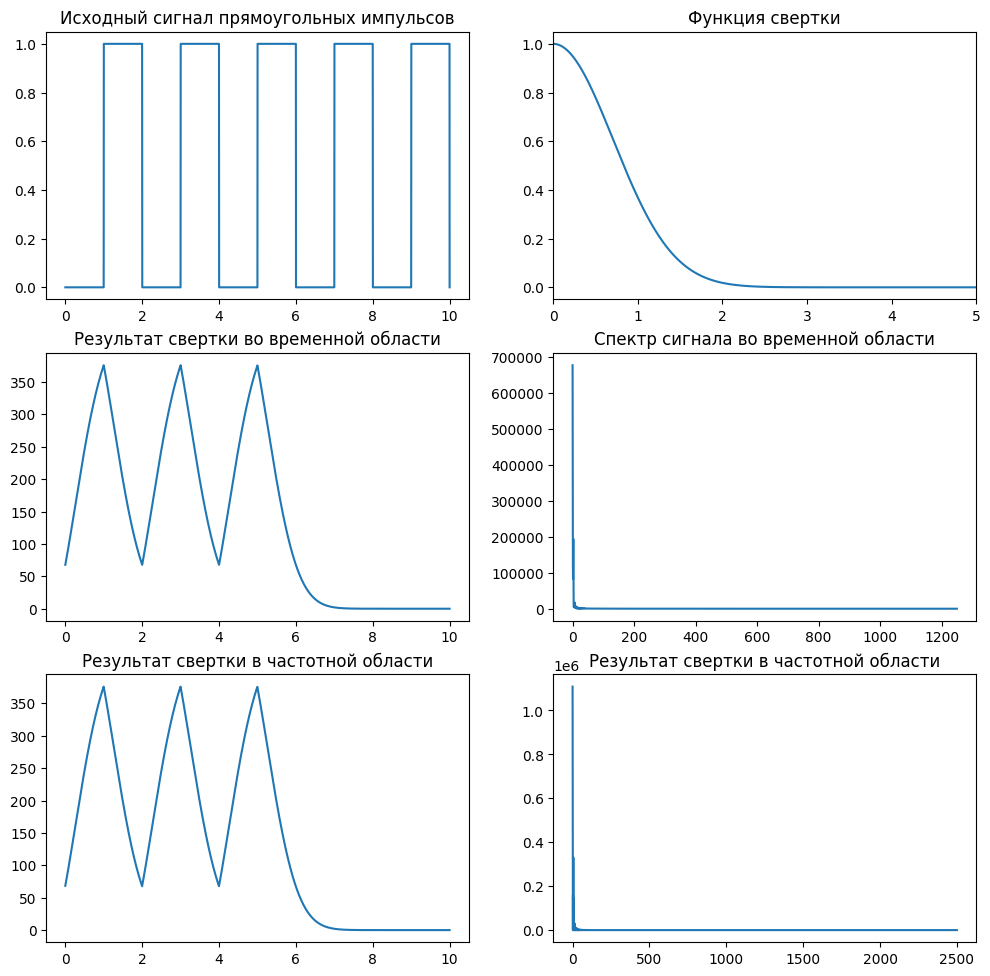

In [69]:
def time_domain(signal, kernel):
    return np.convolve(signal, kernel, mode='same')


def frequency_domain(signal, kernel):
    return 0    
    

# Time-domain
td_conv = np.convolve(y, kernel_1, mode='same')
td_spectrum = np.fft.fft(td_conv)

# Frequency-domain
fd_spectrum =  np.fft.fft(y, 2 * len(y)) * np.fft.fft(kernel_1, 2 * len(y))
fd_conv = np.real(np.fft.ifft(fd_spectrum))

x_freq = np.linspace(0, 2500, sampling_rate)

plt.figure(figsize=(12, 16))

plt.subplot(4, 2, 1)
plt.plot(x, y)
plt.title("Исходный сигнал прямоугольных импульсов")

plt.subplot(4, 2, 2)
plt.plot(x, kernel_1)
plt.xlim(0, 5)
plt.title("Функция свертки")

plt.subplot(4, 2, 3)
plt.plot(x, td_conv)
plt.title("Результат свертки во временной области")

plt.subplot(4, 2, 4)
plt.plot(x_freq[:len(x_freq)//2], np.abs(td_spectrum[:len(td_spectrum)//2]))
plt.title("Спектр сигнала во временной области")

plt.subplot(4, 2, 5)
plt.plot(x, fd_conv[len(y) // 2: len(y) // 2 + len(y)])
plt.title("Результат свертки в частотной области")

plt.subplot(4, 2, 6)
plt.plot(x_freq, np.abs(fd_spectrum[:len(fd_spectrum)//2]))
plt.title("Спектр сигнала в частотной области")

plt.show()

### Задание 4
Разобраться в реализации свертки с ядром Гаусса для реализации сглаживающего фильтра во временной области.

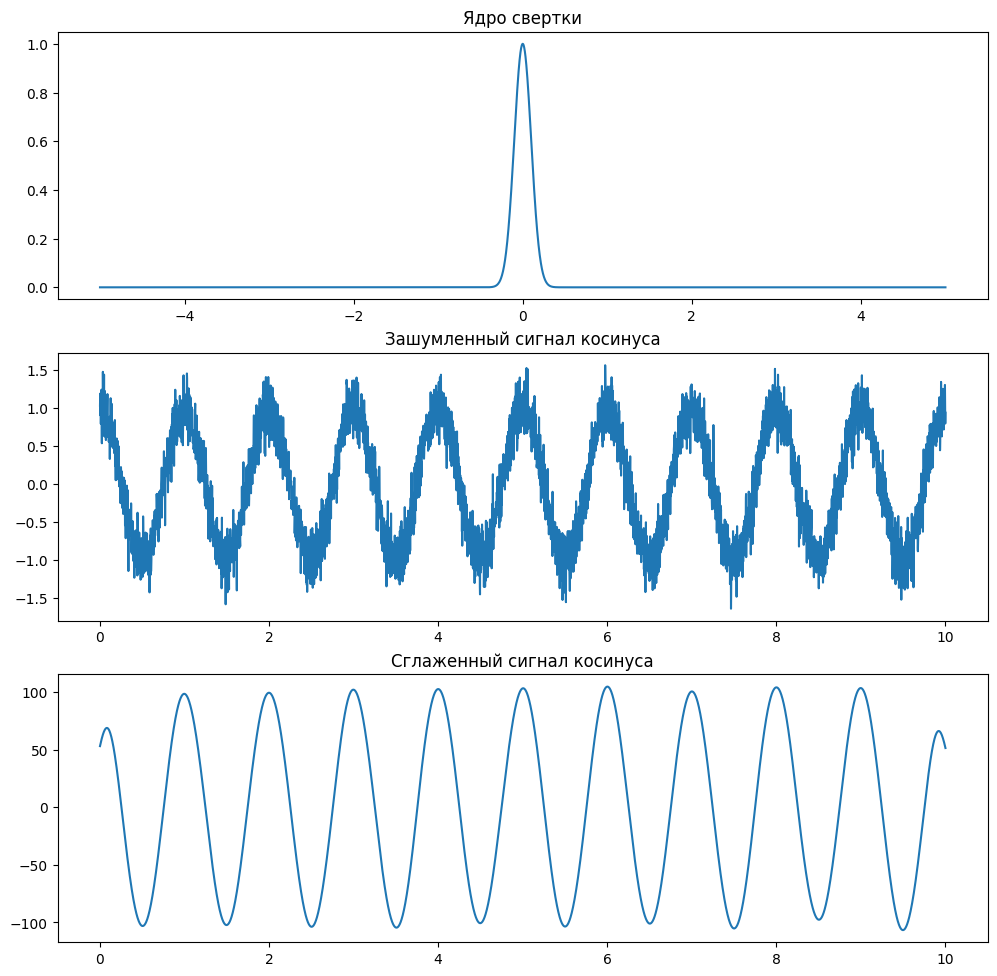

In [186]:
def noised_signal(t):
    return amplitude * np.cos(t * 2 * np.pi) + np.random.normal(0, 0.2, len(t))


def gauss_kernel(expected_value, standard_deviation):
    return lambda x: np.exp(-0.5 * ((x - expected_value) / standard_deviation) ** 2)


y_noised = noised_signal(x)
    
x_kernel = np.linspace(-5, 5, sampling_rate)
kernel = gauss_kernel(0, 0.1)(x_kernel)

conv_noised = np.convolve(y_noised, kernel, mode="same")

plt.figure(figsize=(12, 16))

plt.subplot(4, 1, 1)
plt.plot(x_kernel, kernel)
plt.title("Ядро свертки")

plt.subplot(4, 1, 2)
plt.plot(x, y_noised)
plt.title("Зашумленный сигнал косинуса")

plt.subplot(4, 1, 3)
plt.plot(x, conv_noised)
plt.title("Сглаженный сигнал косинуса")

plt.show()



### Задание 5
Реализовать пункт (4) в частотной области. Убедиться, что результаты совпадают.

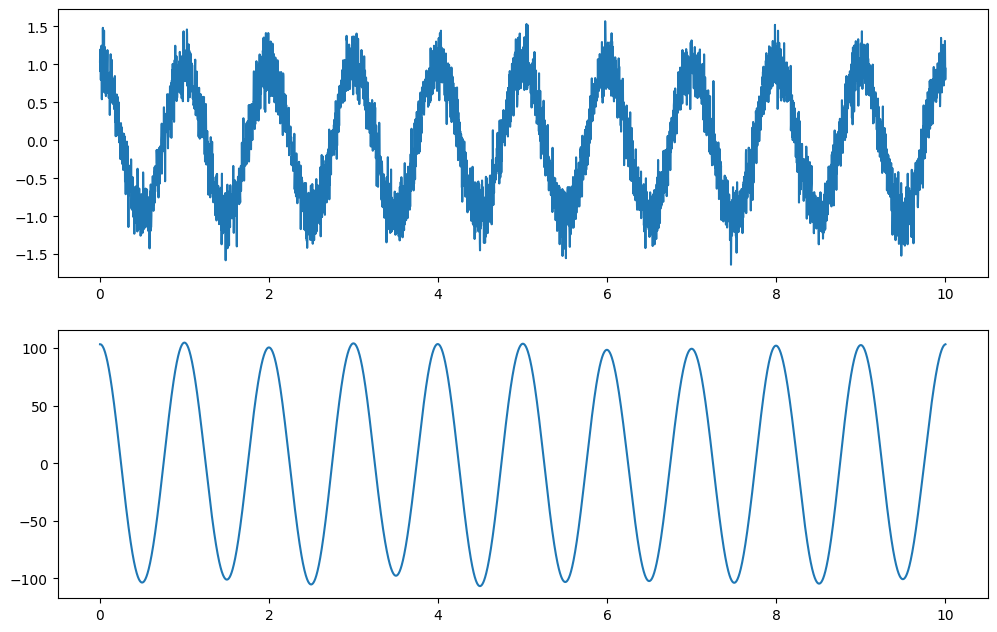

In [188]:
gaussian_noised = np.multiply(np.fft.fft(y_noised), np.fft.fft(kernel))
noised_filtered = np.fft.ifft(gaussian_noised)

plt.figure(figsize=(12, 16))

plt.subplot(4, 1, 1)
plt.plot(x, y_noised)
plt.title("")

plt.subplot(4, 1, 2)
plt.plot(x, noised_filtered)

plt.show()

### Задание 5а
Настройте параметры ядра Гаусса таким образом, чтобы реализовать фильтр нижних частот

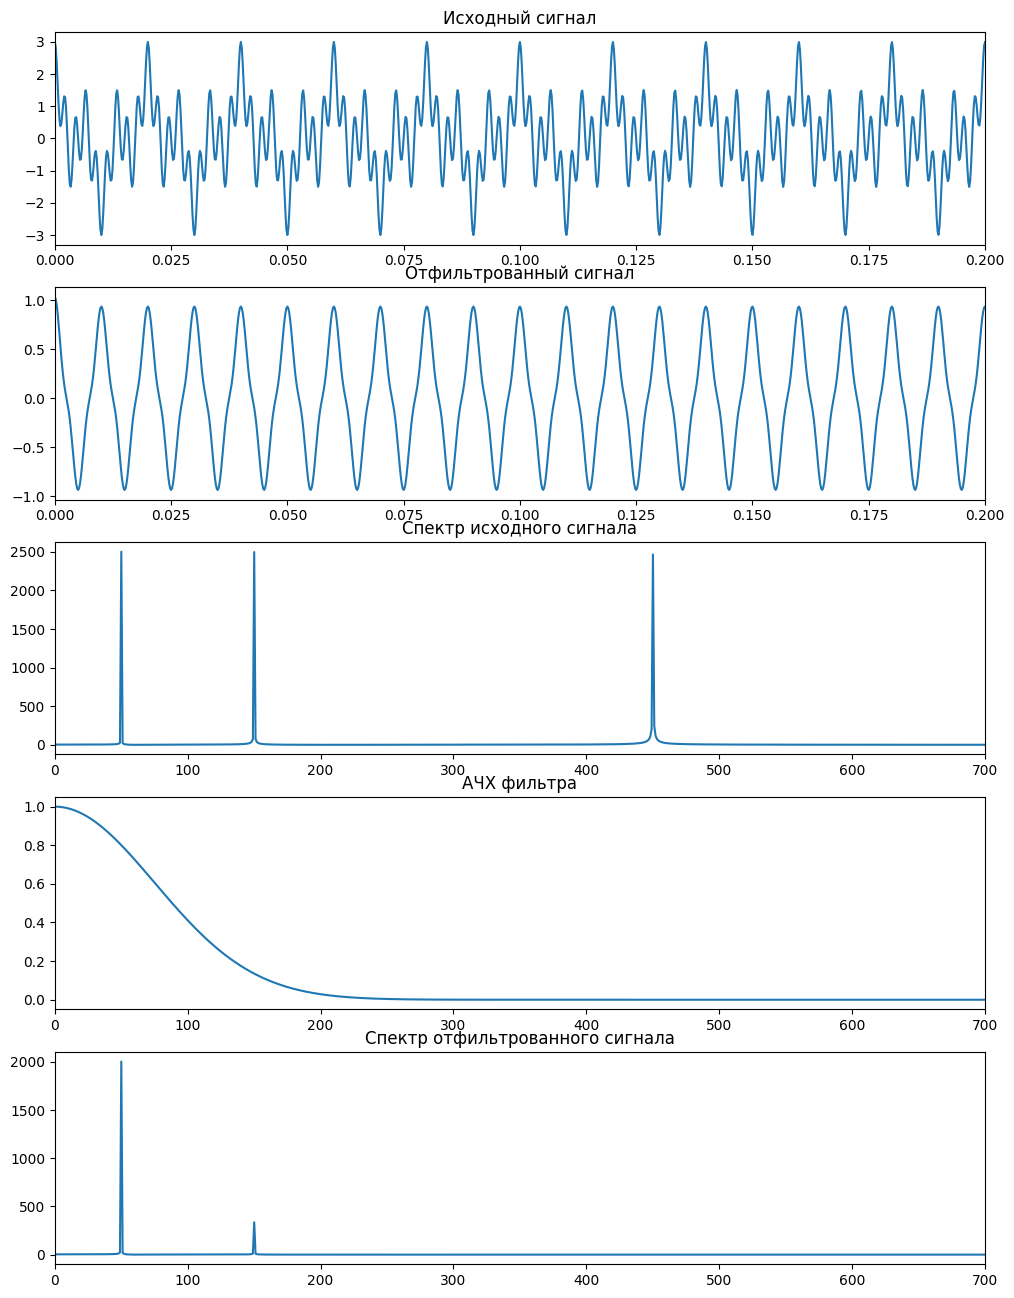

In [259]:
N = 5000
fmax = 1000
T = 1.0/fmax
amp = 1
frequencies = [50, 150, 450]
omegas = [2 * np.pi * frequencies[i] for i in range(len(frequencies))]

def signal(t):
    return amp * (np.cos(t * omegas[0]) + np.cos(t * omegas[1]) + np.cos(t * omegas[2]))

    
x = np.linspace(0, 1, N)
x_freq = np.linspace(0, N//2, N//2)
y = signal(x)

x_fft_signal = np.linspace(0, fmax//2, N//2)
y_fft_signal = np.fft.fft(y)

y_gauss = gauss_kernel(0, 15)(x_fft_signal)

y_fft_filtered = np.multiply(y_fft_signal[0:N//2], y_gauss)
y_ifft_filtered = np.fft.ifft(y_fft_filtered)

plt.figure(figsize=(12, 16))

plt.subplot(5, 1, 1)
plt.plot(x, y)
plt.xlim(0, 0.2)
plt.title("Исходный сигнал")

plt.subplot(5, 1, 2)
plt.plot(x[:N//2], y_ifft_filtered)
plt.xlim(0, 0.2)
plt.title("Отфильтрованный сигнал")

plt.subplot(5, 1, 3)
plt.plot(x_freq, np.abs(y_fft_signal[0:N//2]))
plt.xlim(0, 700)
plt.title("Спектр исходного сигнала")

plt.subplot(5, 1, 4)
plt.plot(x_freq, y_gauss)
plt.xlim(0, 700)
plt.title("АЧХ фильтра")

plt.subplot(5, 1, 5)
plt.plot(x_freq, np.abs(np.real(y_fft_filtered)))
plt.xlim(0, 700)
plt.title("Спектр отфильтрованного сигнала")

plt.show()

### Задание 5б
Настройте параметры ядра Гаусса таким образом, чтобы реализовать: узкополосной фильтр

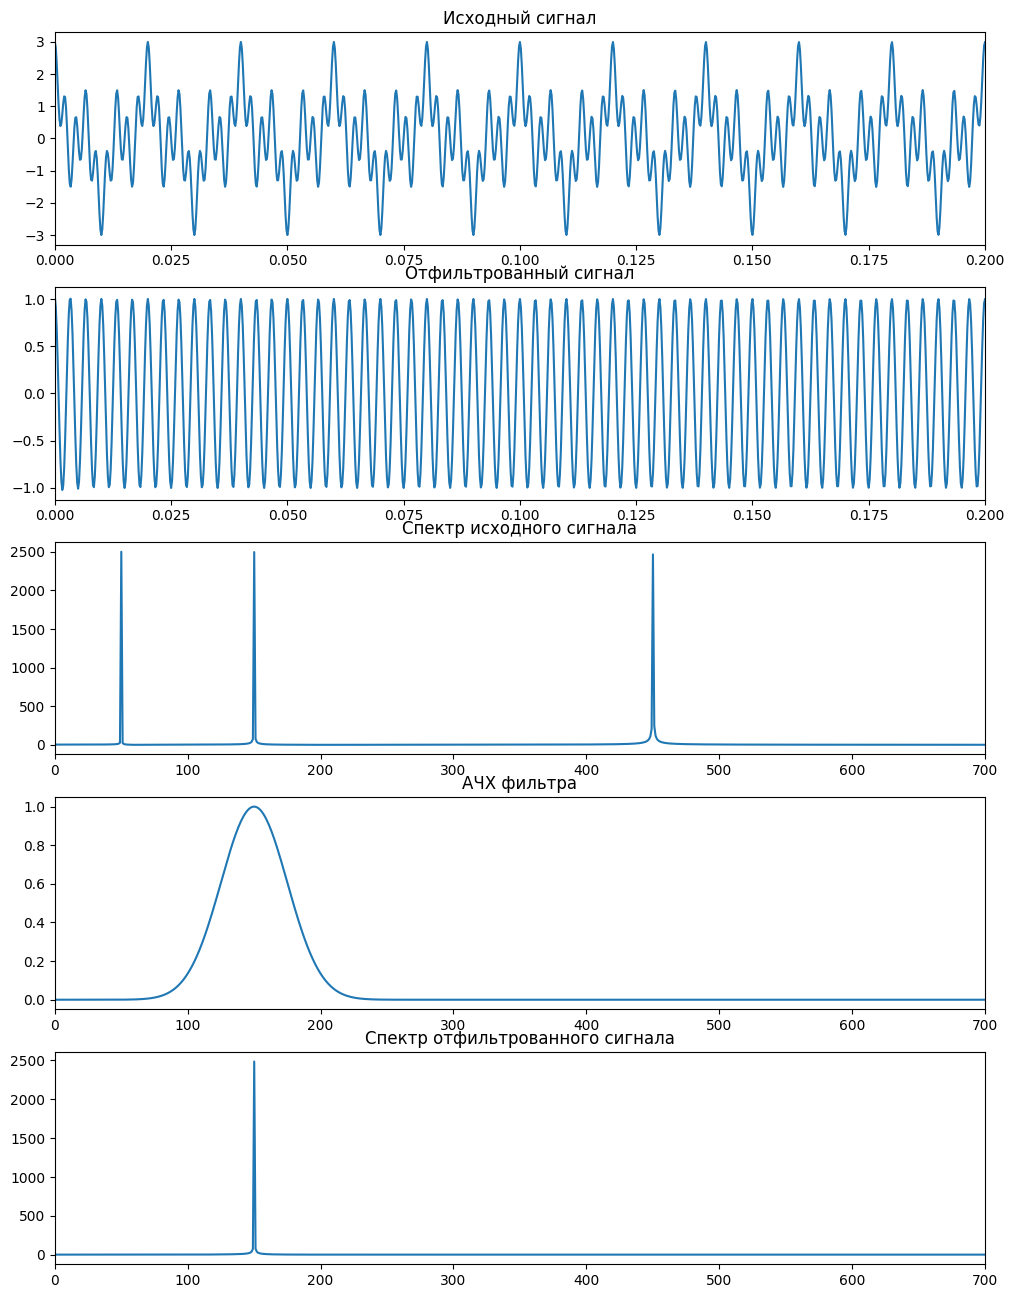

In [264]:
y_gauss = gauss_kernel(30, 5)(x_fft_signal)

y_fft_filtered = np.multiply(y_fft_signal[0:N//2], y_gauss)
y_ifft_filtered = np.fft.ifft(y_fft_filtered)

plt.figure(figsize=(12, 16))

plt.subplot(5, 1, 1)
plt.plot(x, y)
plt.xlim(0, 0.2)
plt.title("Исходный сигнал")

plt.subplot(5, 1, 2)
plt.plot(x[:N//2], y_ifft_filtered)
plt.xlim(0, 0.2)
plt.title("Отфильтрованный сигнал")

plt.subplot(5, 1, 3)
plt.plot(x_freq, np.abs(y_fft_signal[0:N//2]))
plt.xlim(0, 700)
plt.title("Спектр исходного сигнала")

plt.subplot(5, 1, 4)
plt.plot(x_freq, y_gauss)
plt.xlim(0, 700)
plt.title("АЧХ фильтра")

plt.subplot(5, 1, 5)
plt.plot(x_freq, np.abs(np.real(y_fft_filtered)))
plt.xlim(0, 700)
plt.title("Спектр отфильтрованного сигнала")

plt.show()

### Задание 6
(а) Реализовать полосовой фильтр, используя окно Планка.

/tmp/ipykernel_52390/1270049257.py:10: RuntimeWarning: overflow encountered in exp
  out[i] = 1 / (np.exp(z_a(k[i])) + 1)
/tmp/ipykernel_52390/1270049257.py:14: RuntimeWarning: overflow encountered in exp
  out[i] = 1 / (np.exp(z_b(k[i])) + 1)


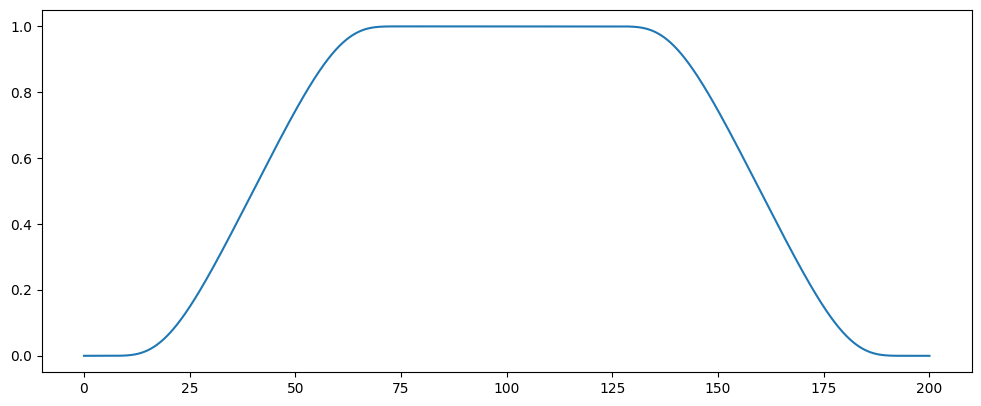

In [297]:
def plank_kernel(eps, N):
    def plank_window(k):
        out = np.zeros_like(k)
        z_a = lambda k: eps * (N - 1) * (1/k + 1/(k - eps * (N - 1)))
        z_b = lambda k: eps * (N - 1) * (1/(N-1-k) + 1/((1 - eps) * (N - 1) - k))
        for i in range(len(k)):
            if k[i] == 0 or k[i] == N-1:
                out[i] = 0
            elif 0 < k[i] < eps*(N - 1):
                out[i] = 1 / (np.exp(z_a(k[i])) + 1)
            elif eps * (N - 1) <= k[i] <= (1 - eps) * (N - 1):
                out[i] = 1
            elif (1 - eps) * (N - 1) < k[i] < N - 1:
                out[i] = 1 / (np.exp(z_b(k[i])) + 1)
        return out
    return plank_window
    
freq = 100
plank = plank_kernel(0.4, 201)

x = np.linspace(0, 200, 5000)
y = plank(x)

plt.figure(figsize=(12, 16))

plt.subplot(3, 1, 1)
plt.plot(x, y)
plt.show()

### Задание 7
(б) Сравнить результат фильтрации зашумленного сигнала при использовании ядра Гаусса и окна Планка.

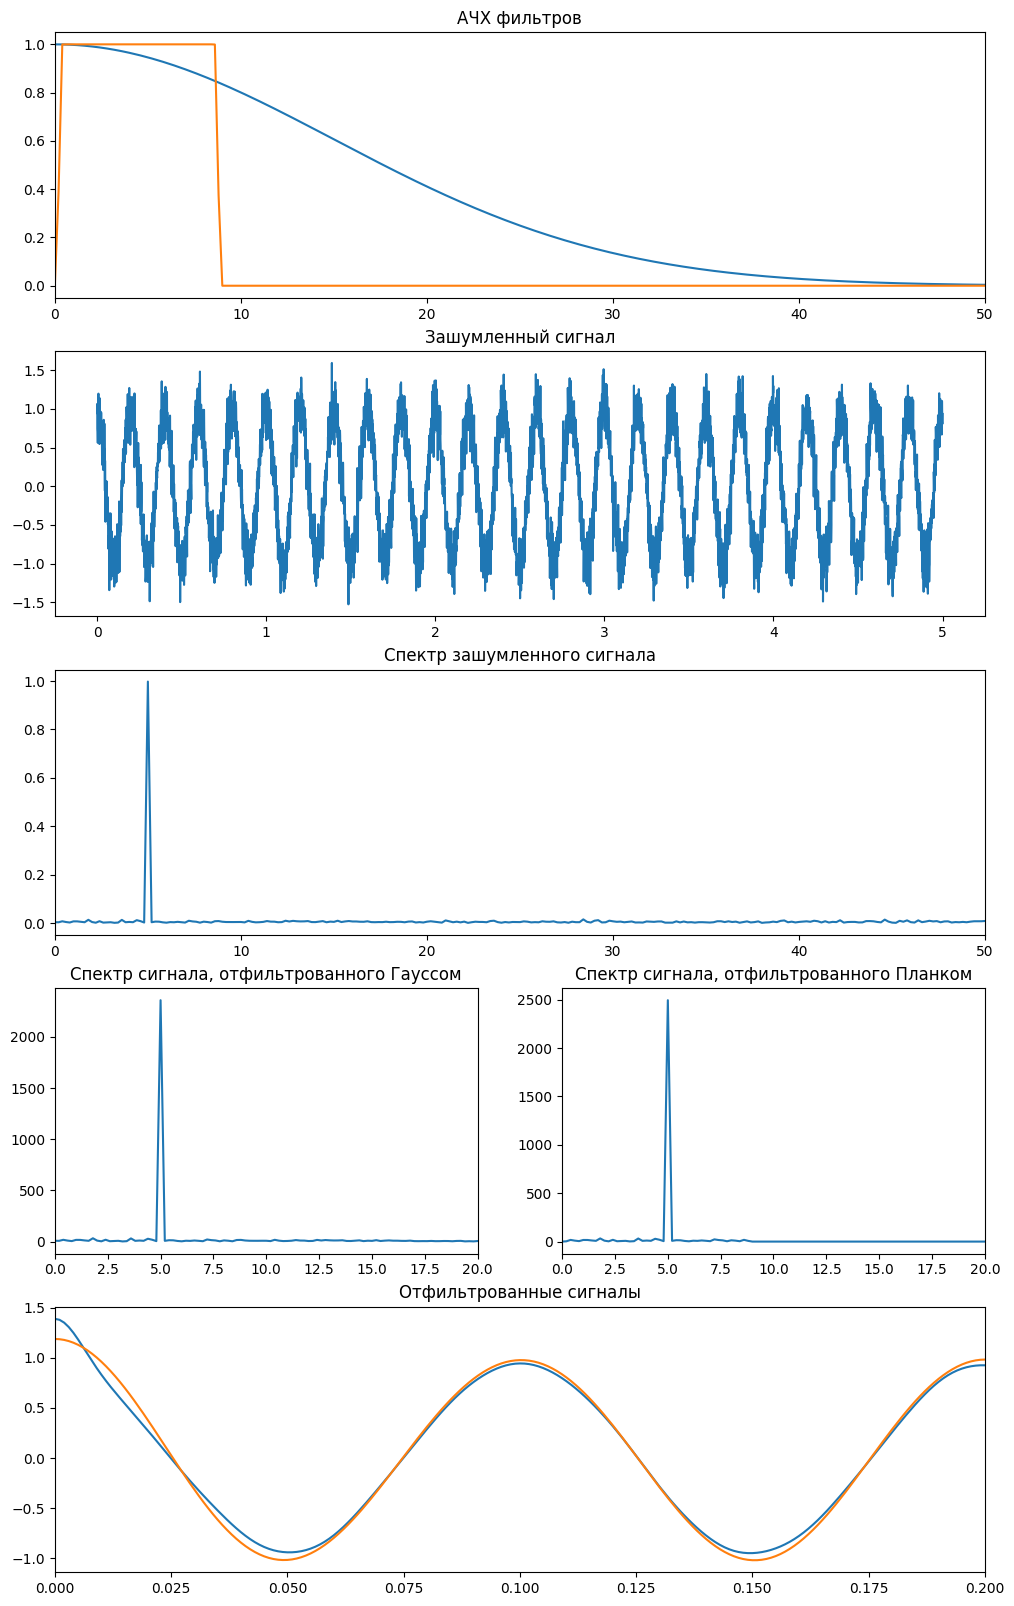

In [311]:
freq = 2500

gauss = gauss_kernel(0, 15)
plank = plank_kernel(0.05, 10)

x_test = np.linspace(0, fmax/2, N//2)
y_gauss = gauss(x_test)
y_plank = plank(x_test)

x = np.linspace(0, N*T, N)
y = np.cos(5 * x * 2 * np.pi) + np.random.normal(0, 0.2, N)

xf = np.linspace(0, fmax/2, N//2)
yf = np.fft.fft(y)

y_fft_gauss = np.multiply(np.abs(yf[0:N//2]), y_gauss)
y_fft_plank = np.multiply(np.abs(yf[0:N//2]), y_plank)

y_ifft_gauss = np.fft.ifft(y_fft_gauss)
y_ifft_plank = np.fft.ifft(y_fft_plank)

plt.figure(figsize=(12, 20))

plt.subplot(5, 1, 1)
plt.plot(x_test, y_gauss)
plt.plot(x_test, y_plank)
plt.title("АЧХ фильтров")
plt.xlim(0, 50)

plt.subplot(5, 1, 2)
plt.plot(x, y)
plt.title("Зашумленный сигнал")

plt.subplot(5, 1, 3)
plt.plot(xf, 2.0/N * np.abs(np.abs(yf[0:N//2])))
plt.xlim(0, 50)
plt.title("Спектр зашумленного сигнала")

plt.subplot(5, 2, 7)
plt.plot(xf, np.abs(np.real(y_fft_gauss)))
plt.xlim(0, 20)
plt.title("Спектр сигнала, отфильтрованного Гауссом")

plt.subplot(5, 2, 8)
plt.plot(xf, np.abs(np.real(y_fft_plank)))
plt.xlim(0, 20)
plt.title("Спектр сигнала, отфильтрованного Планком")

plt.subplot(5, 1, 5)
plt.plot(x[0:freq], y_ifft_gauss)
plt.plot(x[0:freq], y_ifft_plank)

plt.title("Отфильтрованные сигналы")

plt.show()